# Tutorial 7: Numerical Integration

## Exercise 1: Precision of Midpoint Rule

To apply this quadrature, we use the following formula:

$$\int_a^b f(x) dx \approx T(f; P) = h \sum_{i=1}^{n} f(a + hi - \frac{h}{2})$$

**Composite Midpoint Error Bound**: If $f''$ exists and is continuous on the interval [a,b] and if the composite midpoint rule T with uniform spacing h is used to estimate the integral $I = \int_a^b f(x) dx$, then for some $\zeta$ in $(a,b)$,

$$err = \frac{f''(\zeta)}{24}(b - a)h^2$$

**Question**: approximate the following integral $\int_0^1 e^x dx$ with 11 points.

**Answer**: 

$f''(x) = e^x$, since the derivative of $e^x$ is itself.

n = 11 - 1

$h = \frac{1 - 0}{n} = \frac{1}{10}$.

$f''(\zeta)$ is referring to maximum value on the interval, which is e. So:

$err = \frac{e}{24}(1 - 0)(\frac{1}{10})^2 = \frac{e}{2400} \approx 1.13261742 \times 10^{-3}$

We have a moderately large set of points so we can use Julia to evaluate this:

In [1]:
a = 0
b = 1
x = a:0.01:b
f(x) = exp.(x)

n = 11 - 1
h = (b - a)/n

res = 0
for i = 1:n
    res = res + f(a + h*i - h/2)
end
res = h * res
err = abs((exp(b) - exp(a)) - res)
println("The integral error is:\t\t",err)
println("The maximum integral error is:\t",exp(1)/24*(b-a)*h^2)

The integral error is:		0.0007157419979173518
The maximum integral error is:	0.0011326174285246023


This error is smaller than our upper bound.

## Exercise 2: Precision of Trapezoid Rule

To apply this quadrature, we use the following formula:

$$\int_a^b f(x) dx \approx T(f; P) = \frac{1}{2} \sum_{i=0}^{n-1} (x_{i+1} - x_i)[f(x_i) + f(x_{i+1})]$$

With uniform spacing, $x_i = a + ih$ and $h = \frac{b-a}{n}$ for $i = 1,2,...,n-1$, we have:

$$\int_a^b f(x) dx \approx T(f; P) = \frac{h}{2} [f(x_0) + f(x_{n})] + h \sum_{i=1}^{n-1} f(x_i) $$

**Composite Trapezoidal Error Bound**: If $f''$ exists and is continuous on the interval [a,b] and if the composite trapezoid rule T with uniform spacing h is used to estimate the integral $I = \int_a^b f(x) dx$, then for some $\zeta$ in $(a,b)$,

$$I - T = - \frac{b-a}{12} h^2 f''(\zeta) = O(h^2)$$

**DISCLAIMER**: Note that this is an error upper bound. $\zeta$ is the value which maximizes $f^{(2)}$ within the interval.

**Question**: Compute an approximate value of:

$$\int_0^1 \frac{1}{x^2 + 1} dx$$

by using the composite trapezoid rule with three points. Then compare with the actual value of the integral. Next, determine the error formula and numerically verify an upper bound on it.

**Answer**:

**Given**:

$a=0$ (integral lower bound)

$b = 1$ (int. upper bound)

$n = 3 - 1 = 2$ (subintervals)

$h = \frac{b-a}{n} = 0.5$ (stepsize)

$x_1 = 0.5$ (midpoint spacing)

$f(x) = \frac{1}{1 + x^2}$ (function)

$f^{(2)}(x) = \frac{6x^2 - 2}{(x^2 + 1)^3}$ (2nd derivative of above func.)

$M = \max_{x \in [a,b]} |f^{(2)}(x)| = f''(\zeta) = 2$

We can visualize the trapezoidal rule quadrature as follows:

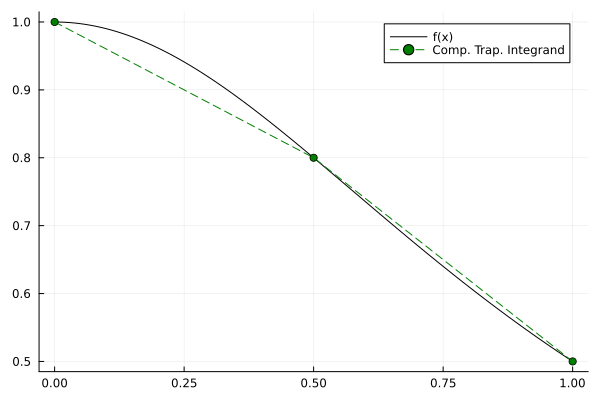

In [2]:
using Plots
a = 0
b = 1
n = 3 - 1
h = (b - a)/n
f(x) = @. 1 / (x^2 + 1)
x = a:0.01:b
t = a:h:b

plot(x,f.(x),label="f(x)", color=:black)
plot!(t,f.(t),label="Comp. Trap. Integrand", color=:green, linestyle=:dash, marker=:circle)

There are only three points which make two subintervals:

$f(a) = f(0) = \frac{1}{1 + 0^2} = 1$

$f(x_i) = f(0.5) = \frac{1}{1 + 0.5^2} = 0.8$

$f(b) = f(1) = \frac{1}{1 + 1^2} = 0.5$

Using the composite trapezoid rule:

$\int_a^b \approx h(\frac{1}{2} f(a) + \frac{1}{2} f(b) + f(x_i))$

$= 0.5(0.5(1) + 0.5^2 + 0.5(0.8)) = 0.775000$

Keep in mind that the above integral is equal to $arctan(1) = \frac{\pi}{4} \approx 0.785398$, so:

$$err \approx 0.785398 - 0.775000 = 1.0398 \times 10^{-2}$$

Using our error bound from earlier:

$UBE = \frac{1}{12} (0.5)^2 \times 2 = 4.1667 \times 10^{-2} \geq 1.0398 \times 10^{-2} = err$

Now, we can try this in Julia. Recall that the quadrature formula for uniform spacing is:

$$\int_a^b f(x) dx \approx T(f; P) = \frac{h}{2} [f(x_0) + f(x_{n})] + h \sum_{i=1}^{n-1} f(x_i) $$

The code snippet below empirically finds the error for n = 2 ( the above question) and n = 50.

In [3]:
a = 0
b = 1
x = a:0.01:b
f(x) = @. 1 / (x^2 + 1)

# n = 2
n = 3 - 1
h = (b - a)/n
t = a:h:b

res = h/2 * (f(a) + f(b))
for i = 1:n-1
    res = res + h * f(a + h*i)
end
err = abs(atan(1) - res)
println("Integration error using 3 nodes:\t",err)
println("Maximum integration error (3 nodes):\t",1/12*(b-a)*h^2*2)

# n = 50
n = 50
h = (b - a)/n
t = a:h:b

res = h/2 * (f(a) + f(b))
for i = 1:n-1
    res = res + h * f(a + h*i)
end
err = atan(1) - res
println("\nIntegration error using 51 nodes:\t",err)
println("Maximum integration error (51 nodes):\t",1/12*(b-a)*h^2*2)

Integration error using 3 nodes:	0.010398163397448257
Maximum integration error (3 nodes):	0.041666666666666664

Integration error using 51 nodes:	1.6666666634912453e-5
Maximum integration error (51 nodes):	6.666666666666667e-5


We can visualize this as follows:

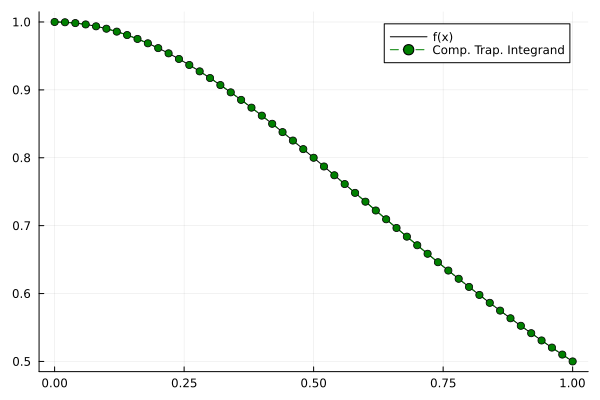

In [4]:
using Plots
a = 0
b = 1
n = 50
h = (b - a)/n
f(x) = @. 1 / (x^2 + 1)
x = a:0.01:b
t = a:h:b

plot(x,f.(x),label="f(x)", color=:black)
plot!(t,f.(t),label="Comp. Trap. Integrand", color=:green, linestyle=:dash, marker=:circle)

## Exercise 3: Precision of Simpson's Rule

To apply this quadrature, we use the following formula:

$$\int_a^b f(x) dx \approx T(f; P) = \frac{h}{3} [f(a) + 2 \sum_{i = 1}^{n/2 - 1} f(t_{2i}) + 4 \sum_{i=1}^{n/2} f(t_{2i - 1}) + f(b)] $$

**Composite Simpson's Rule Error Bound**: If $f^{(4)}$ exists and is continuous on the interval [a,b] and if the composite trapezoid rule T with uniform spacing h is used to estimate the integral $I = \int_a^b f(x) dx$, then for some $\zeta$ in $(a,b)$,

$$err = -\frac{f^{(4)}(\zeta)}{180}(b - a)h^4$$

We can use this quadrature on our earlier function:

$$\int_0^1 \frac{1}{x^2 + 1} dx$$

The 4th derivative is found to be:

$f^{(4)} = \frac{120x^4-240x^2+24}{(x^2 + 1)^5}$

$M = f^{(4)}(\zeta) = 24$ (maximum of 4th derivative in [0,1])

h = 0.5 (same as last exercise)

$err = -\frac{24}{180}(1-0)(\frac{1}{2})^4$

$err = -\frac{24}{180}(\frac{1}{16}) = \frac{1}{120} = 0.008\bar{3}$

We can do the evaluation in Julia. Recall that the comp. Simpson's rule is:

$$\int_a^b f(x) dx \approx T(f; P) = \frac{h}{3} [f(a) + 2 \sum_{i = 1}^{n/2 - 1} f(t_{2i}) + 4 \sum_{i=1}^{n/2} f(t_{2i - 1}) + f(b)] $$

In [5]:
a = 0
b = 1
x = a:0.01:b
f(x) = @. 1 / (x^2 + 1)

# n = 2
n = 3 - 1
h = (b - a)/n
t = a:h:b

res = (f(a) + f(b))
for i = 1:(div(n,2)-1) # floor divide
    res = res + 2 * f(a + h*(2*i))
end
for i = 1:(div(n,2)) # floor divide
    res = res + 4 * f(a + h*(2*i - 1))
end
res = res * h / 3
err = abs(atan(1) - res)
println("Integration error:\t\t",err)
println("Maximum integration error:\t",1/180*(b-a)*h^4*24)

Integration error:		0.002064830064114953
Maximum integration error:	0.008333333333333333


As you can see, this is much more precise than composite trapezoidal rule for a smaller n.  
Remember that with 3 nodes, the composite trapezoidal rule had an error of 0.0104.

## Exercise 4: Adaptive Simpson's

By implementing Simpson's quadrature rule using a Divide and Conquer recursive algorithm, we can concentrate the computations on the areas where the function is poorly approximated.

In [6]:
function adapt(f, a, b, limit, tol)

    ##  println("adapt called with a=$a, b=$b, limit=$limit")

    h = b-a
    c = (a + b)/2
 
    a1 = (f(a) + f(b)) * h/2          ## trapezoid
    a2 = (f(a) + 4*f(c) + f(b)) * h/6  ## Simpson's

    if abs(a1 - a2) < tol || limit == 0
        return(a2)
    end

    return adapt(f, a, c, limit - 1,tol) + adapt(f, c, b, limit-1,tol)
end

adapt (generic function with 1 method)

In [7]:
toll = 0.0001
res = adapt(x -> exp(x), 0, 1, 10, toll)
err = abs((exp(1) - exp(0)) - res)
println("Integration error tolerance:\t\t",toll)
println("Integration error (exponential):\t",err)

Integration error tolerance:		0.0001
Integration error (exponential):	9.102726572507436e-9


In [8]:
res = adapt(x -> 1 / (x^2 + 1), 0, 1, 10, toll)
err = abs(atan(1) - res)
println("Integration error tolerance:\t\t",toll)
println("Integration error (polynomial):\t\t",err)

Integration error tolerance:		0.0001
Integration error (polynomial):		3.6636382372279286e-7
